### TP1 : Source coding

On crée nous même un alphabet A avec les probas associés, on génère un vecteur aléatoire avec les symboles de l'alphabet. On calcule l'entropie, puis l'entropie réelle à partir de l'apparition des symboles dans le vecteur. 

In [26]:
Alphabet = {'A': 0.36, 'B': 0.12,'C': 0.35,'D': 0.04,'E': 0.09,'F': 0.01,'G': 0.03}

In [27]:
import random

def genVecteur(n, Alpha):
    tab = []
    for i in range(n) :
        r = random.randint(0,999999999)
        r = r%100
        val = 0.0
        for cle,valeur in Alpha.items():
            val += valeur*100
            if (r <= val) :
                tab.append (cle)
                break
    return tab 


In [28]:
import math as m

def entropieReelle(X, Alpha):
    # print(X)
    dico = {}
    ent = 0
    for key in Alpha:
        dico[key] = 0
    for i in range (len(X)):
        dico[X[i]]=dico[X[i]]+1
    for cle, valeur in dico.items():
        pReelle = valeur/len(X)
        if pReelle != 0:
            ent = ent + pReelle*m.log(pReelle, 2)
    return -ent

In [29]:
entropieReelle(genVecteur(100, Alphabet), Alphabet)

2.23410119393586

In [30]:
Alphabet2 = {'A': 0.5, 'B': 0.5 }

entropieReelle(genVecteur(1000, Alphabet2), Alphabet2)

0.9994343896240241

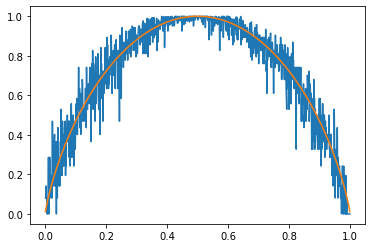

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def affichage(n):
    Lx = np.linspace(0.001,0.999,n)
    LyR=[]
    LyT=[]
    for a in Lx:
        Alphabet3 = {'0': a, '1': 1-a}
        LyT.append(-(a*m.log(a,2) + (1-a)*m.log(1-a,2)))
        LyR.append(entropieReelle(genVecteur(100, Alphabet3), Alphabet3))
    plt.plot(Lx, LyR)
    plt.plot(Lx, LyT)
    plt.show()
    
affichage(1000)

Question 4

            (p00               p10)
            (p01               p11)

(p0     p1) (p0*p00+p1*p01     p0*p10+p1*p11)

On a donc p0 = p0*p00+p1*p01 en régime stationnaire

or p1 = 1-p0

On obtient donc p0*p00 + (1-p0)*p01 = p0

p0*(p00-1-p01)=-p01

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

H(xk)   = Σ (xk|x(k-1)).p(x(k-1))
        = H(xk|x(k-1)=0).p(x(k-1)=0) + H(xk|x(k-1)=1).p(x(k-1)=1)
        = H(xk|x(k-1)=0).p0 + H(xk|x(k-1)=1).p1
        = -[ p(xk=0|x(k-1)=0).log2(p(xk=0|x(k-1)=0)) + p(xk=1|x(k-1)=0).log2(p(xk=1|x(k-1)=0)) ].p0
          -[ p(xk=0|x(k-1)=1).log2(p(xk=0|x(k-1)=1)) + p(xk=1|x(k-1)=1).log2(p(xk=1|x(k-1)=1)) ].p1
        = -[ p00.log2(p00) + p01.log2(p01) ].p0 - [ p10.log2(p10) + p11.log2(p11) ].p1
          

In [32]:
from PIL import Image as Img
import numpy as np

def matriceTransition(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    nN = 0
    bN = 0
    for i in range(len(imgData)):
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel noir et que le pixel "proche" associé est noir
                nN += 1 # on augmente le compteur de pixel noir associé à un pixel noir
            if imgData[i][j] == 1 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel blanc et que le pixel "proche" associé est noir
                bN += 1 # on augmente le compteur de pixel blanc associé à un pixel noir
    nbPixel = len(imgData)*len(imgData[0]) # on calcule le nombre de pixels total
    P = [[nN/nbPixel, 1-(nN/nbPixel)], [bN/nbPixel, 1-(bN/nbPixel)]]
    return P

In [33]:
[[p00, p10], [p01, p11]] = matriceTransition(r"./image.png")

import math as m

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

# Entropie H(xk)
H1 = -(p00*m.log(p00,2)+p01*m.log(p01,2))*p0 - (p10*m.log(p10,2)+p11*m.log(p11,2))*p1

# Entropie de la source sans mémoire ?
H2 = -p0*m.log(p0,2) - p1*m.log(p1,2)

# Taille moyenne
# 1 bit par pixel


print (H1, H2)

KeyboardInterrupt: 

In [ ]:
from PIL import Image as Img
import numpy as np

def matriceTransition2(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    res = []
    for i in range(len(imgData)):
        colorActual = "B"
        string_row = ""
        nombrePixel = 0
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 :#si pixel noir
                if colorActual == "N" :#si série de pixels noirs
                    nombrePixel += 1
                else :#si série de pixels blancs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "N"
            else :#si pixel blanc
                if colorActual == "B" :#si série de pixels blancs
                    nombrePixel += 1
                else :#si série de pixels noirs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "B"
        string = colorActual + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
        colorActual = "B"
    return res


#print(matriceTransition2(r"./image.png"))

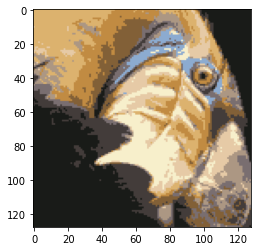

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

# Question 2 et 3
def kMeansAlgo(k):
    image = cv2.imread('ex9Data/bird_small.tiff') 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((image.shape)) 
    return (image, segmented_image)

def dessinerImg(img):
    plt.imshow(img)

#Question 3
(img, imgSeg) = kMeansAlgo(10)
dessinerImg(imgSeg)

In [2]:
#Question 4

from sklearn.metrics import mean_squared_error
import numpy as np

def D(k):
    (img, imgseg) = kMeansAlgo(k)
    MSE = np.square(np.subtract(img,imgseg)).mean()    
    return MSE

D(10)

75.12355550130208

In [19]:
#Question 4

def codingRateRLE(k):
    (img, imgData) = kMeansAlgo(k)
    res, codebook, index = [], {}, 1
    for i in range(len(imgData)): # on parcourt toutes les lignes de l'image
        colorActual = imgData[i][0] # on initialise la première couleur
        string_row = "" # chaîne représentant la ligne en cours d'étude
        nombrePixel = 0 # nombre de pixels de cette couleur
        for j in range(len(imgData[0])): # on parcourt une ligne de l'image
            if (imgData[i][j] == colorActual).all() : # si la couleur du pixel étudié est identique à la précédente
                nombrePixel += 1 # on augmente
            else : # sinon (si la couleur est différente)
                if nombrePixel != 0 : # si le nombre de pixel est non nul
                    (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
                    string = str(codeIn) + " " + str(nombrePixel) + ";"
                    string_row += string
                nombrePixel = 1
                colorActual = imgData[i][j]
                codeIn = codebook.get(colorToKey(list(colorActual)))
        colorActual = imgData[i][j]
        (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
        string = str(codeIn) + " " + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
    return res, codebook

In [4]:
# Fonctions annexes TP2 Q4

def colorToKey(liste):
    string = ""
    for i in range (3):
        string+= str(liste[i])
        if i != 2:
            string+= ","
    return string

def miseEnDico(dico, color, index):
    cle = colorToKey(list(color))
    if cle not in dico: # on regarde si on connaît ce code couleur dans le codebook
        dico[cle]=index # on ajoute la clé au dictionnaire
        code = index # on conserve le code de cette couleur
        index+=1
    else: # si la clé est connue
        code = dico.get(cle) # on récupère le code de cette couleur
    return (code,dico, index)


    

['0 93;1 1;0 2;2 2;3 30', '0 93;1 2;0 2;2 1;3 30', '0 94;1 1;0 3;3 30', '0 75;4 1;0 2;4 1;0 1;4 1;0 14;1 2;0 1;2 1;3 2;2 1;3 26', '0 50;2 2;0 6;2 5;0 10;4 4;0 1;4 1;0 1;4 3;0 12;1 2;0 2;3 2;2 2;3 25', '0 53;2 14;0 3;2 1;4 13;0 11;1 3;0 1;2 1;3 1;2 2;3 25', '0 53;2 18;4 14;0 11;1 3;0 1;2 1;4 1;2 1;3 25', '0 53;2 19;4 6;2 1;4 7;0 10;1 3;0 3;2 1;3 25', '0 52;2 19;4 3;2 6;4 7;0 9;1 4;0 2;2 2;3 24', '0 28;4 3;0 20;2 19;4 2;2 2;3 1;2 7;4 2;2 1;4 3;0 8;1 4;0 2;2 2;3 24'] {'209,165,97': 0, '237,222,187': 1, '119,93,68': 2, '31,32,29': 3, '151,142,145': 4}


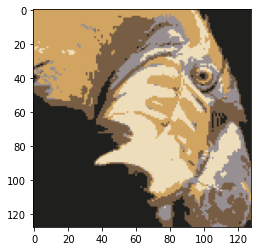

In [5]:
#Test Q4

(result, cb) = codingRateRLE(5)
print(result[0:10],cb)
(im1, im2)=kMeansAlgo(5)
dessinerImg(im2)

In [5]:
import math

def R(k) :
    (result, cb) = codingRateRLE(k)
    weight_codebook = 3*8*k
    ligne = list(result[0])
    i = len(ligne)
    nb_pixel = 0
    save = False
    j = 0
    valeur = ""
    while j < i :
        if ligne[j] == ' ' :
            save = True
        elif ligne[j] == ';' :
            nb_pixel += int(valeur)
            valeur =""
            save = False
        elif save :
            valeur +=ligne[j]
        else :
            pass
        j += 1
    nb_pixel += int(valeur)  #nombre de pixel par ligne
    count = 0               #nombre de valeurs différentes pour toutes les lignes
    for line in result :
        compteur = 1
        val = list(line)
        for c in val :
            if c == ';' :
                compteur += 1
        count += compteur
    nb_ligne = len(result)
    taille_couleur = int(math.ceil(math.log2(k)))
    taille_valeur = int(math.ceil(math.log2(nb_pixel)))
    resultat = (weight_codebook + count*(taille_valeur+taille_couleur))/(nb_pixel*nb_ligne)
    return resultat

In [24]:
import math 
from math import floor, log

def R2(k): 
    img = 'ex9Data/bird_small.tiff'
    rle, codebook = codingRateRLE(k)
    res = 0
    image = cv2.imread(img)
    nb_col = image.shape[0]
    nb_ligne = image.shape[1]
    for i in range(len(rle)):
        raw = rle[i]
        list = raw.split(";")
        for obj in list:
            couple = obj.split(" ")
            res += floor(log(int(couple[0]),2)) + floor(log(int(couple[1]),2)) + 2
    res += 24*k 
    res = res / (nb_col*nb_ligne)
    return res

R2(4)
    

1 93;2 1;1 2;3 2;4 30
['1', '93']
['2', '1']
['1', '2']
['3', '2']
['4', '30']
1 93;2 2;1 2;3 1;4 30
['1', '93']
['2', '2']
['1', '2']
['3', '1']
['4', '30']
1 94;2 1;1 2;3 1;4 30
['1', '94']
['2', '1']
['1', '2']
['3', '1']
['4', '30']
1 63;3 1;1 31;2 2;1 1;3 1;4 2;3 1;4 26
['1', '63']
['3', '1']
['1', '31']
['2', '2']
['1', '1']
['3', '1']
['4', '2']
['3', '1']
['4', '26']
1 50;3 2;1 3;3 1;1 2;3 5;1 6;3 1;1 25;2 2;1 2;4 2;3 2;4 25
['1', '50']
['3', '2']
['1', '3']
['3', '1']
['1', '2']
['3', '5']
['1', '6']
['3', '1']
['1', '25']
['2', '2']
['1', '2']
['4', '2']
['3', '2']
['4', '25']
1 50;3 1;1 1;3 15;1 2;3 3;1 2;3 1;1 20;2 3;1 1;3 1;4 1;3 2;4 25
['1', '50']
['3', '1']
['1', '1']
['3', '15']
['1', '2']
['3', '3']
['1', '2']
['3', '1']
['1', '20']
['2', '3']
['1', '1']
['3', '1']
['4', '1']
['3', '2']
['4', '25']
1 50;3 1;1 1;3 22;1 22;2 3;3 4;4 25
['1', '50']
['3', '1']
['1', '1']
['3', '22']
['1', '22']
['2', '3']
['3', '4']
['4', '25']
1 52;3 21;1 3;3 5;1 15;2 3;1 3;3 1;4 25
['1',

0.57757568359375

In [23]:
# Question 5
from matplotlib import pyplot

def courbeDR():
    Lx = []
    Ly = []
    for k in range (2, 21):
        Lx.append(R2(k))
        Ly.append(D(k))
    pyplot.scatter(Lx, Ly, c = 'red')

courbeDR()


TypeError: R2() missing 1 required positional argument: 'k'

In [ ]:
# I(x,y)= H(x) + H(y) - H(x,y)
# I(x,y) = Somme(j=0 à J-1) Somme(k=0 à K-1) p(xj,yk).log2(p(xj,yk)/[p(xj)*p(yk)])

In [ ]:
import json

def reconstructionImage(RLE, codebook):
    decodebook = changementDico(codebook)
    image = []
    for i in range (len(RLE)):
        ligne = []
        liste = RLE[i].split(";")
        for j in range(len(liste)):
            liste2 = liste[j].split(" ")
            for k in range (int(liste2[1])):
                ligne.append(decodebook.get(int(liste2[0])))
        image.append(np.array(ligne))
    return np.array(image)

def keyToColor(string):
    liste = string.split(",")
    listeARendre = []
    for i in range(3):
        listeARendre.append(int(liste[i]))
    return np.array(listeARendre)

def changementDico(dico):
    dictionnaireCouleurs = {}
    for cle,valeur in dico.items():
        dictionnaireCouleurs[valeur]=keyToColor(cle)
    return dictionnaireCouleurs

def affichage_image(path_cb, path_rle) :
    f = open(path_cb, "r")
    codebook = json.load(f)
    f.close()
    g = open(path_rle, "r")
    image = []
    image = json.load(g)
    g.close()
    dessinerImg (reconstructionImage(image, codebook))

def stockage_image(path_cb, path_rle) :
    k = 11
    (res, codebook) = codingRateRLE(k)
    f = open(path_cb, "w")
    json.dump(codebook, f)
    f.close()
    g = open(path_rle, "w")
    json.dump(res, g)
    g.close()
    print("fait")


path_cb = "./cb.json"
path_rle = "./rle.json"
stockage_image(path_cb, path_rle)
affichage_image(path_cb, path_rle)

#img = reconstructionImage(result, cb)
#dessinerImg(img)